In [9]:
df = pd.read_csv('StudentsPerformance.csv')
print(df.head())
print(df.columns)


   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing sco

In [10]:
import numpy as np
df['ClusterID'] = np.random.randint(0, 3, size=len(df))  # Example with 3 clusters!


In [11]:
import pandas as pd

# Use the correct filename
df = pd.read_csv('StudentsPerformance.csv')
print(df.head())
print(df.columns)


   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing sco

In [12]:
import numpy as np

df['ClusterID'] = np.random.randint(0, 3, size=len(df))  # Example: 3 clusters (0, 1, 2)
print(df[['ClusterID']].head())


   ClusterID
0          2
1          1
2          1
3          1
4          0


In [14]:
print(df.groupby('ClusterID').mean(numeric_only=True))
# Optional: See counts per cluster
print(df['ClusterID'].value_counts())

           math score  reading score  writing score
ClusterID                                          
0           67.100304      69.443769      68.474164
1           66.356164      69.695890      68.446575
2           64.683007      68.245098      67.133987
ClusterID
1    365
0    329
2    306
Name: count, dtype: int64


In [15]:
cluster_recommendations = {
    0: {
        'Recommendation': 'Increase study hours; follow a fixed timetable.',
        'Tool/Technique': 'Use Pomodoro Timer App; join peer study groups.'
    },
    1: {
        'Recommendation': 'Maintain current routine; focus on weak areas.',
        'Tool/Technique': 'Revision flashcards; interactive quizzes.'
    },
    2: {
        'Recommendation': 'Improve class participation and attendance.',
        'Tool/Technique': 'Set attendance reminders; classroom engagement apps.'
    }
}


In [16]:
def generate_recommendation(cluster_id):
    return cluster_recommendations.get(cluster_id, {
        'Recommendation': 'No specific advice. Consult a mentor.',
        'Tool/Technique': 'Educational platform resources.'
    })

df['Recommendation'] = df['ClusterID'].apply(lambda x: generate_recommendation(x)['Recommendation'])
df['Tool/Technique'] = df['ClusterID'].apply(lambda x: generate_recommendation(x)['Tool/Technique'])
print(df.head())


   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   ClusterID                                   Recommendation  \
0          2      Improve class participation and attendance.   
1          1   Maintai

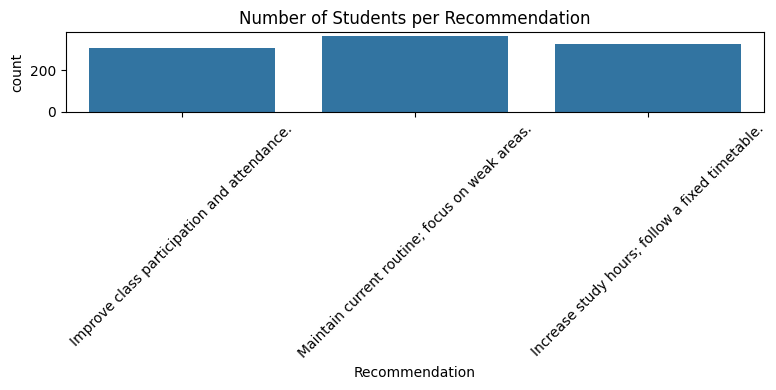

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create the directory if it doesn't exist
output_dir = 'visualizations'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Recommendation')
plt.title('Number of Students per Recommendation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'recommendation_countplot.png'))
plt.show()

In [19]:
df.to_csv('StudentsPerformance_with_recommendations.csv', index=False)
